# Practice Case 04 - Foundation of Machine Learning

### by Okky Adhi Qomarudin

#### Dataset is historical flight data in Malaysia from Oct 2018 – Nov 2018

In [350]:
import pandas as pd # data wrangling
import numpy as np # perhitungan
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
from scipy.optimize import curve_fit

#### Load Dataset 

In [488]:
df_raw = pd.read_csv('dataset/training_dataset.csv')
df_test =pd.read_csv('dataset/test_dataset.csv')

In [4]:
df_raw.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


#### Check columns and values of the dataset

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [7]:
df_raw.describe()

,id,delay
count,111068.000000,111068.000000
mean,202365.798475,11.540210
std,149258.072773,26.806913
min,1.000000,0.000000
25%,61496.750000,0.000000
50%,189313.500000,1.000000
75%,329683.250000,13.000000
max,496596.000000,978.000000


In [9]:
df_raw.isnull().sum()

id                                0
number                            0
airline                           0
airline_name                      0
scheduled_departure_time          0
scheduled_arrival_time            5
departure_airport_city            0
departure_airport_code            0
departure_airport_country         0
departure_airport_gate        44209
departure_airport_name            0
departure_airport_region          0
departure_airport_terminal    41340
departure_airport_timezone        0
arrival_airport_city              0
arrival_airport_code              0
arrival_airport_country           0
arrival_airport_gate          98981
arrival_airport_name              0
arrival_airport_region            0
arrival_airport_terminal      58018
arrival_airport_timezone          0
flight_equipment_iata            19
flight_equipment_name            19
flight_duration                   3
delay                             0
dtype: int64

In [29]:
for col in df_raw.columns:
    if col != 'id':
        print("COLUMNS NAME = {}".format(col))
        print(df_raw[col].value_counts())
        print('\n')

COLUMNS NAME = number
MH5312     114
MH3401     114
AF8398     104
KL810      104
GA9088     104
ID*6018    102
MXD1215     94
MH3690      94
ID*7164     94
MXD9116     94
AK5640      94
EK3313      94
AK5414      94
AK6047      94
AK6413      94
MH1133      94
AK6061      94
UL2133      94
MH2802      94
AK5202      94
AK5432      94
AK1490      94
AK6462      94
AK6224      94
MH5290      93
QR5026      93
MH3123      93
AK6115      90
AK5142      90
MXD1008     90
          ... 
SV3817       1
CX78         1
MH1394       1
AK9276       1
MH6173       1
MH615        1
KA691        1
SV3815       1
SV3833       1
AK9138       1
LJ66         1
MXD9119      1
MXD573       1
SV3829       1
FY7321       1
PK9896       1
VI1179       1
7L*672       1
D7532        1
MH2548       1
AK9878       1
SV3835       1
SV3813       1
SV3819       1
CV7855       1
SV3821       1
SV3831       1
MXD7020      1
SV3837       1
MH6240       1
Name: number, Length: 2515, dtype: int64


COLUMNS NAME = airli

Name: departure_airport_terminal, dtype: int64


COLUMNS NAME = departure_airport_timezone
Asia/Kuala_Lumpur    111068
Name: departure_airport_timezone, dtype: int64


COLUMNS NAME = arrival_airport_city
Kuala Lumpur          20535
Singapore             12553
Penang                 6374
Kuching                5043
Kota Kinabalu          4675
Bangkok                3809
Johor Bharu            3556
Langkawi               3412
Jakarta                3167
Kota Bharu             2882
Hong Kong              2714
Miri                   2297
Tawau                  1667
Kuala Terengganu       1632
Sibu                   1591
Denpasar               1483
Alor Setar             1432
Phuket                 1286
Kuala Namu             1260
Ho Chi Minh City       1185
Guangzhou              1136
Bintulu                1123
Tokyo                  1092
Taipei                 1045
Labuan                  976
Seoul                   895
Colombo                 808
Manila                  792
Sandakan    

#### Put on dictionary


In [127]:
abbr_companies = df_raw.set_index('airline')['airline_name'].to_dict()
abbr_companies

{'AK': 'AirAsia',
 'ID*': 'Batik Air',
 'MXD': 'Malindo Air',
 'RX': 'Regent Airways',
 'D7': 'AirAsia X',
 'NH': 'ANA',
 'UA': 'United Airlines',
 'AC': 'Air Canada',
 'EK': 'Emirates',
 'QR': 'Qatar Airways',
 'MH': 'Malaysia Airlines',
 'JT*': 'Lion Air',
 'GA': 'Garuda Indonesia',
 'MI': 'SilkAir',
 'SQ': 'Singapore Airlines',
 'CZ': 'China Southern Airlines',
 '9W': 'Jet Airways (India)',
 'TK': 'Turkish Airlines',
 'WE*': 'Thai Smile',
 'TG': 'Thai Airways International',
 'PR': 'Philippine Airlines',
 'AA': 'American Airlines',
 'WY': 'Oman Air',
 'KL': 'KLM',
 'UL': 'SriLankan Airlines',
 'QZ': 'Indonesia AirAsia',
 'QF': 'Qantas',
 '3K': 'Jetstar Asia',
 'MF': 'Xiamen Airlines',
 'VA': 'Virgin Australia',
 'CX': 'Cathay Pacific',
 'KA': 'Cathay Dragon',
 'NZ': 'Air New Zealand',
 'CA': 'Air China',
 'ZH': 'Shenzhen Airlines',
 'PG': 'Bangkok Airways',
 '8M': 'Myanmar Airways International',
 'CI': 'China Airlines',
 'AI': 'Air India',
 'JL': 'JAL',
 'TR': 'Scoot',
 'IB': 'Iber

#### Basic Statistic Delay of Airlins

In [174]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean(),
           'sum':group.sum()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df_raw['delay'].groupby(df_raw['airline_name']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('sum')
global_stats


,count,max,mean,min,sum
airline_name,,,,,
Guangxi Beibu Gulf Airlines,36.0,0.0,0.000000,0.0,0.0
Hong Kong Airlines,16.0,0.0,0.000000,0.0,0.0
YTO Cargo,24.0,0.0,0.000000,0.0,0.0
Firefly,4468.0,0.0,0.000000,0.0,0.0
Silk Way West,14.0,0.0,0.000000,0.0,0.0
Volga-Dnepr,1.0,10.0,10.000000,10.0,10.0
AHK,5.0,33.0,9.000000,0.0,45.0
TAP Portugal,35.0,23.0,1.485714,0.0,52.0
Uni-Top Airlines,13.0,35.0,8.076923,0.0,105.0


## Best Airlines<br>
#### Guangxi Beibu Gulf Airlines	<br>
#### Hong Kong Airlines	<br>
#### YTO Cargo <br>
#### Firefly	<br>
#### Silk Way West <br>

In [137]:
df2 = df_raw.loc[:, ['airline', 'delay']]
df2['airline'] = df2['airline'].replace(abbr_companies)


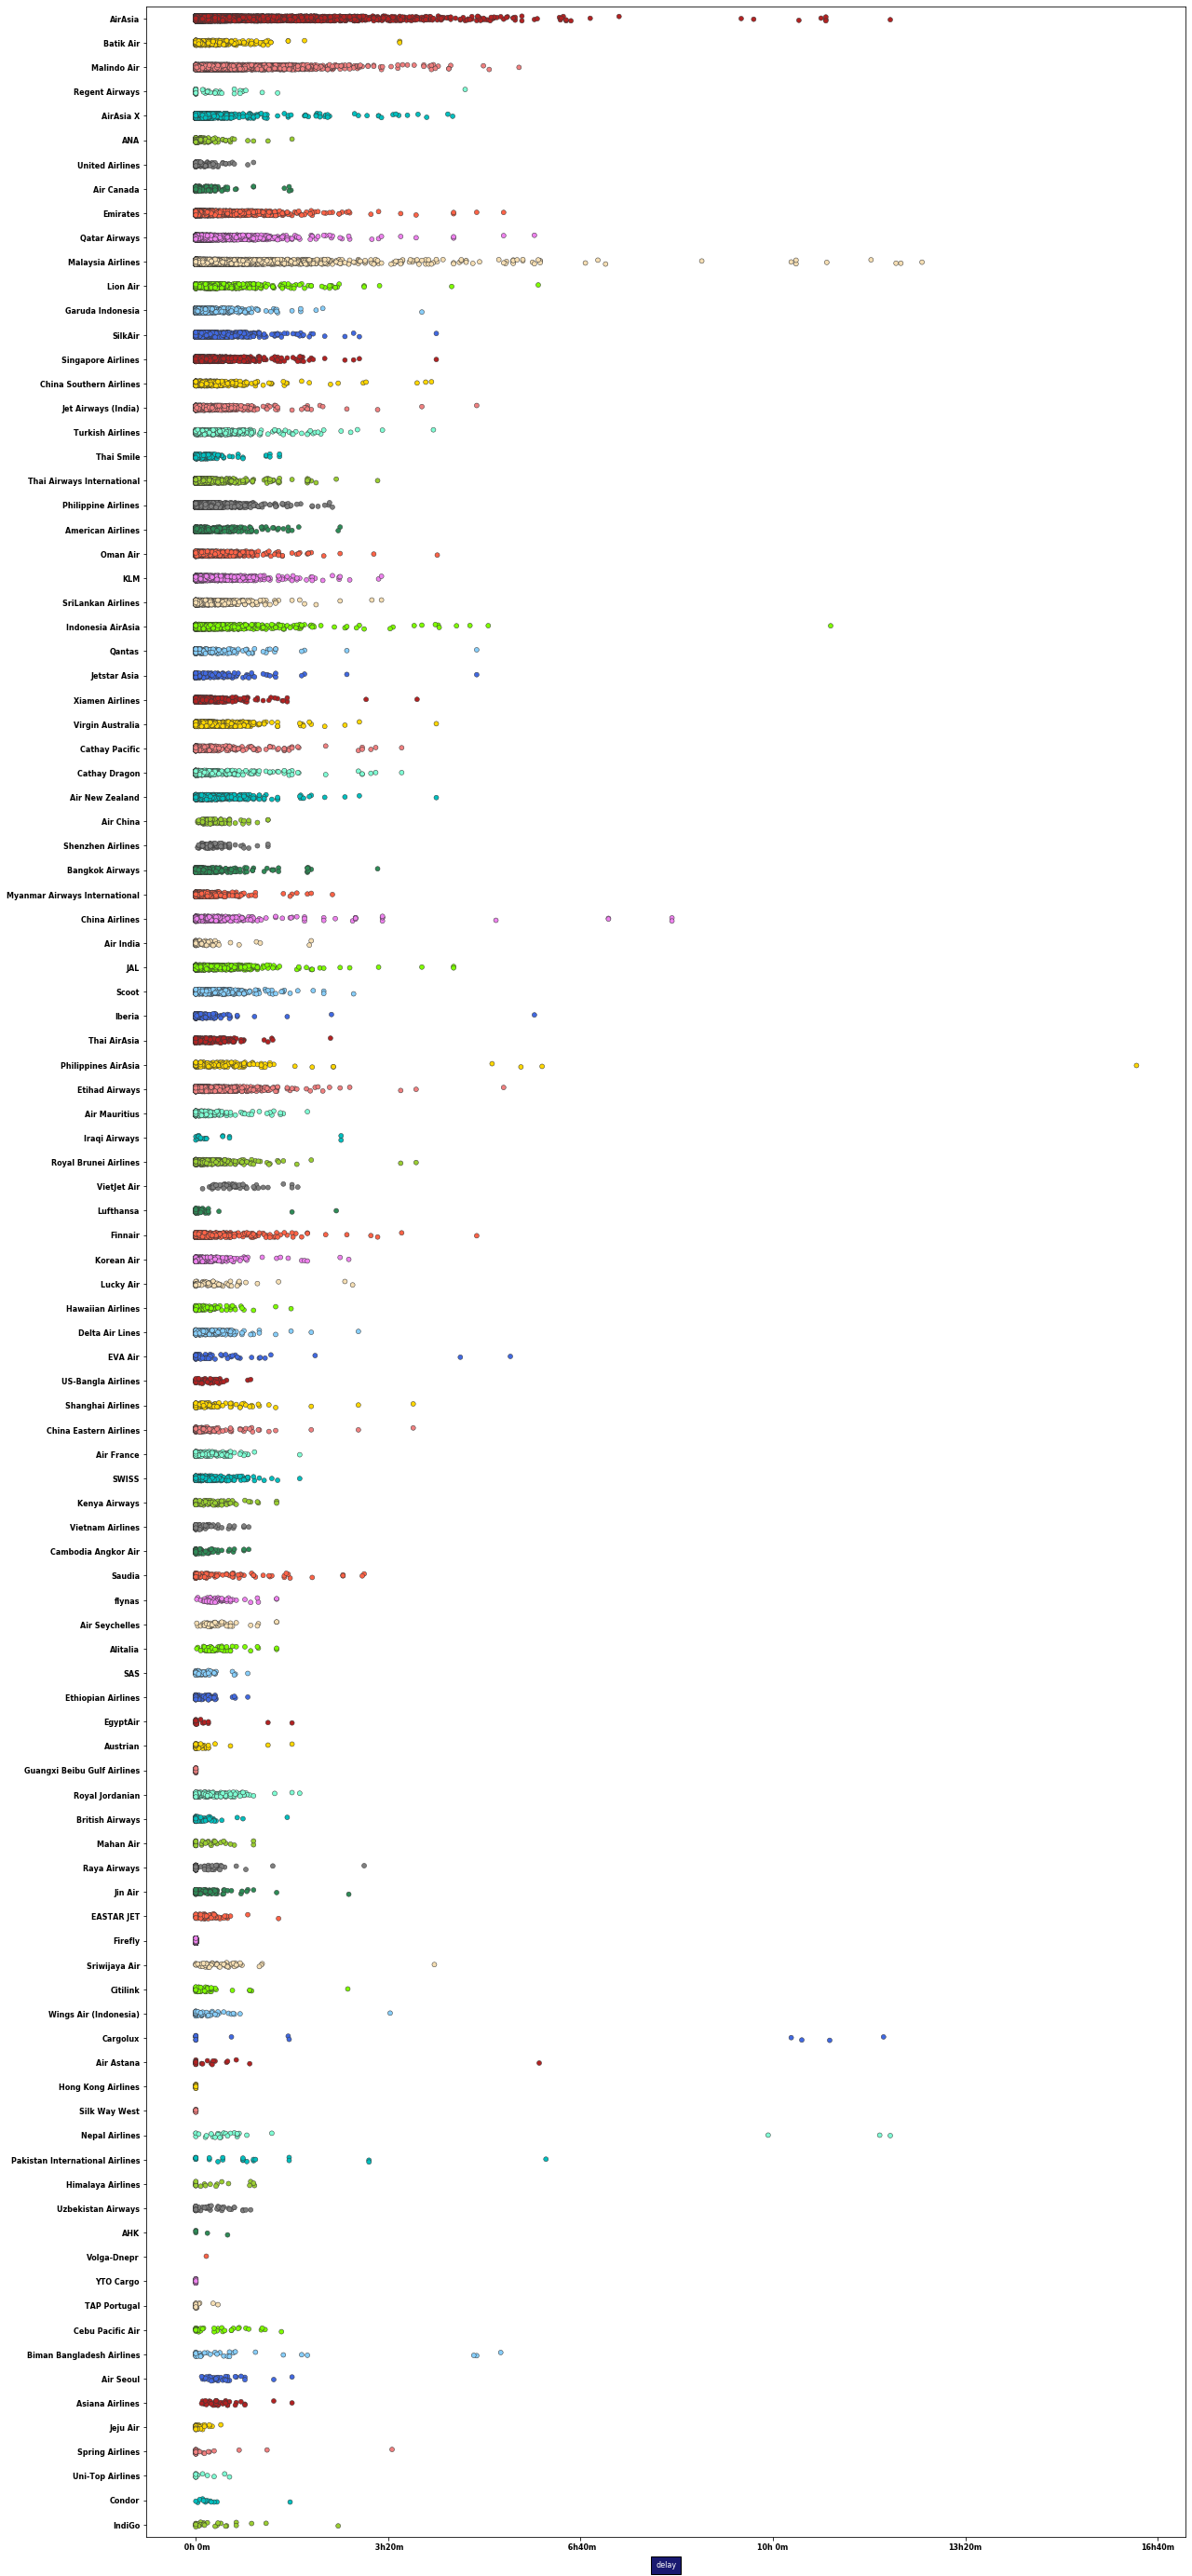

In [170]:

import matplotlib as mpl
font = { 'weight' : 'bold', 'size'   : 8}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
plt.figure(figsize=(20,50))
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="airline", x="delay", palette = colors,
                    data=df2, linewidth = 0.5)
plt.setp(ax3.get_xticklabels(), fontsize=8)
plt.setp(ax3.get_yticklabels(), fontsize=8)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('delay', fontsize=8, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=10)
ax3.yaxis.label.set_visible(False)
#________________________



## Feature Engineering

#### Most of dataset consist string, we need to do feature engineering

#### Group the flight equipment

In [548]:
df_raw.head(1)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus


In [497]:
df_raw['flight_type'] = ""
boeing = df_raw[df_raw.flight_equipment_name.str.contains('Boeing',na=False)].index
airbus = df_raw[df_raw.flight_equipment_name.str.contains('Air',na=False)].index
other = df_raw[(df_raw.flight_equipment_name.str.contains('Boeing',na=False)==False) & \
       (df_raw.flight_equipment_name.str.contains('Airbus',na=False)==False)].index

df_raw.loc[boeing,'flight_type'] = 'Boeing'
df_raw.loc[airbus,'flight_type'] = 'Airbus'
df_raw.loc[other,'flight_type'] = 'Other'

In [490]:
df_test['flight_type'] = ""
boeing = df_test[df_test.flight_equipment_name.str.contains('Boeing',na=False)].index
airbus = df_test[df_test.flight_equipment_name.str.contains('Air',na=False)].index
other = df_test[(df_test.flight_equipment_name.str.contains('Boeing',na=False)==False) & \
       (df_test.flight_equipment_name.str.contains('Airbus',na=False)==False)].index

df_test.loc[boeing,'flight_type'] = 'Boeing'
df_test.loc[airbus,'flight_type'] = 'Airbus'
df_test.loc[other,'flight_type'] = 'Other'

In [288]:
df_raw.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,flight_equipment_name,flight_duration,delay,flight_type,time_hour,day_group,dawn,evening,morning,night
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,Airbus A318 / A319 / A320 / A321,58m,2,Airbus,22,night,0,0,0,1
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,Airbus A318 / A319 / A320 / A321,1h 55m,8,Airbus,22,night,0,0,0,1
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,Airbus A318 / A319 / A320 / A321,1h 55m,8,Airbus,22,night,0,0,0,1
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,Airbus A318 / A319 / A320 / A321,2h 54m,0,Airbus,22,night,0,0,0,1
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,Airbus A318 / A319 / A320 / A321,3h 17m,0,Airbus,22,night,0,0,0,1


In [493]:
from sklearn.preprocessing import OneHotEncoder

In [549]:
dataset_dummies = df_raw['flight_type']
dataset_dummies_2 = pd.get_dummies(dataset_dummies)

In [499]:
dataset_dummies = df_test['flight_type']
dataset_dummies_2 = pd.get_dummies(dataset_dummies)

In [314]:
dataset_dummies_2.columns

Index(['Airbus', 'Boeing', 'Other'], dtype='object')

In [550]:
df_raw = pd.concat([df_raw,dataset_dummies_2], axis = 1 )

In [500]:
df_test = pd.concat([df_test,dataset_dummies_2], axis = 1 )

In [501]:
df_test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,Boeing,0,1,0
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,Boeing,0,1,0
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Kota Kinabalu,BKI,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27,Boeing,0,1,0
3,483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Langkawi,LGK,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95,Airbus,1,0,0
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Tokyo,NRT,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20,Boeing,0,1,0


In [317]:
df_model = df_raw[['delay','Airbus', 'Boeing', 'Other']]

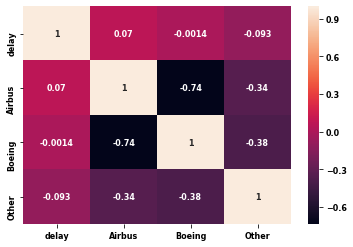

In [318]:
corr = df_model.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,annot=True)

### Bining Time Departure

In [551]:
df_raw.head(1)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus,1,0,0


In [552]:
import datetime

df_raw['time_hour'] =  pd.to_datetime(df_raw['scheduled_departure_time']).dt.hour

In [502]:
df_test['time_hour'] =  pd.to_datetime(df_test['scheduled_departure_time']).dt.hour

In [503]:
df_test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,Boeing,0,1,0,0
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,Boeing,0,1,0,0
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Kota Kinabalu,BKI,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27,Boeing,0,1,0,0
3,483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Langkawi,LGK,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95,Airbus,1,0,0,0
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Tokyo,NRT,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20,Boeing,0,1,0,0


In [277]:
def day_group(time_hour):
    if  time_hour < 4:
        return 'dawn'
    if time_hour < 12:
        return 'morning'
    if time_hour < 16:
        return 'afternoon'
    if time_hour < 20:
        return 'evening'
    else:
        return 'night'

In [553]:
# df_raw.drop(['evening','afternoon'],axis=1,inplace=True)

df_raw['day_group'] = df_raw['time_hour'].apply(day_group)

In [504]:
df_test['day_group'] = df_test['time_hour'].apply(day_group)


## One hot encoder 

In [448]:
from sklearn.preprocessing import OneHotEncoder

### One hot encoder  day group

In [555]:
df_raw.head(1)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour,day_group
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus,1,0,0,22,night


In [556]:
dataset_dummies = df_raw['day_group']
dataset_dummies_2 = pd.get_dummies(dataset_dummies,drop_first=True)

In [506]:
dataset_dummies = df_test['day_group']
dataset_dummies_2 = pd.get_dummies(dataset_dummies,drop_first=True)

In [308]:
dataset_dummies_2.columns

Index(['afternoon', 'dawn', 'evening', 'morning', 'night'], dtype='object')

In [558]:
df_raw = pd.concat([df_raw,dataset_dummies_2], axis = 1 )

In [559]:
df_raw.head(1)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour,day_group,dawn,evening,morning,night
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus,1,0,0,22,night,0,0,0,1


In [507]:
df_test = pd.concat([df_test,dataset_dummies_2], axis = 1 )

In [509]:
df_test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour,day_group,dawn,evening,morning,night
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,Boeing,0,1,0,0,dawn,1,0,0,0
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,Boeing,0,1,0,0,dawn,1,0,0,0
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Kota Kinabalu,BKI,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27,Boeing,0,1,0,0,dawn,1,0,0,0
3,483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Langkawi,LGK,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95,Airbus,1,0,0,0,dawn,1,0,0,0
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Tokyo,NRT,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20,Boeing,0,1,0,0,dawn,1,0,0,0


In [510]:
df_raw.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,Airbus
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,Airbus
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Sandakan,SDK,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0,Airbus
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Hanoi,HAN,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0,Airbus


In [311]:
df_model = df_raw[['delay','night','dawn','morning','evening','afternoon']]

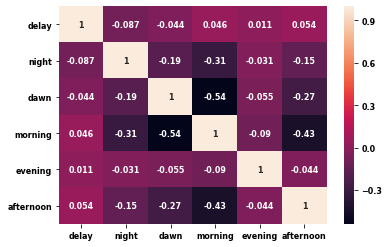

In [312]:
corr = df_model.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,annot=True)

***

### One hot encode Airline 

In [561]:
dataset_dummies = df_raw['airline_name']
dataset_dummies_2 = pd.get_dummies(dataset_dummies,drop_first=True, prefix='AIRLINE_')

In [562]:
df_raw = pd.concat([df_raw,dataset_dummies_2], axis = 1 )

In [563]:
df_raw.head(1)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour,day_group,dawn,evening,morning,night,AIRLINE__ANA,AIRLINE__Air Astana,AIRLINE__Air Canada,AIRLINE__Air China,AIRLINE__Air France,AIRLINE__Air India,AIRLINE__Air Mauritius,AIRLINE__Air New Zealand,AIRLINE__Air Seoul,AIRLINE__Air Seychelles,AIRLINE__AirAsia,AIRLINE__AirAsia X,AIRLINE__Alitalia,AIRLINE__American Airlines,AIRLINE__Asiana Airlines,AIRLINE__Austrian,AIRLINE__Bangkok Airways,AIRLINE__Batik Air,AIRLINE__Biman Bangladesh Airlines,AIRLINE__British Airways,AIRLINE__Cambodia Angkor Air,AIRLINE__Cargolux,AIRLINE__Cathay Dragon,AIRLINE__Cathay Pacific,AIRLINE__Cebu Pacific Air,AIRLINE__China Airlines,AIRLINE__China Eastern Airlines,AIRLINE__China Southern Airlines,AIRLINE__Citilink,AIRLINE__Condor,AIRLINE__Delta Air Lines,AIRLINE__EASTAR JET,AIRLINE__EVA Air,AIRLINE__EgyptAir,AIRLINE__Emirates,AIRLINE__Ethiopian Airlines,AIRLINE__Etihad Airways,AIRLINE__Finnair,AIRLINE__Firefly,AIRLINE__Garuda Indonesia,AIRLINE__Guangxi Beibu Gulf Airlines,AIRLINE__Hawaiian Airlines,AIRLINE__Himalaya Airlines,AIRLINE__Hong Kong Airlines,AIRLINE__Iberia,AIRLINE__IndiGo,AIRLINE__Indonesia AirAsia,AIRLINE__Iraqi Airways,AIRLINE__JAL,AIRLINE__Jeju Air,AIRLINE__Jet Airways (India),AIRLINE__Jetstar Asia,AIRLINE__Jin Air,AIRLINE__KLM,AIRLINE__Kenya Airways,AIRLINE__Korean Air,AIRLINE__Lion Air,AIRLINE__Lucky Air,AIRLINE__Lufthansa,AIRLINE__Mahan Air,AIRLINE__Malaysia Airlines,AIRLINE__Malindo Air,AIRLINE__Myanmar Airways International,AIRLINE__Nepal Airlines,AIRLINE__Oman Air,AIRLINE__Pakistan International Airlines,AIRLINE__Philippine Airlines,AIRLINE__Philippines AirAsia,AIRLINE__Qantas,AIRLINE__Qatar Airways,AIRLINE__Raya Airways,AIRLINE__Regent Airways,AIRLINE__Royal Brunei Airlines,AIRLINE__Royal Jordanian,AIRLINE__SAS,AIRLINE__SWISS,AIRLINE__Saudia,AIRLINE__Scoot,AIRLINE__Shanghai Airlines,AIRLINE__Shenzhen Airlines,AIRLINE__Silk Way West,AIRLINE__SilkAir,AIRLINE__Singapore Airlines,AIRLINE__Spring Airlines,AIRLINE__SriLankan Airlines,AIRLINE__Sriwijaya Air,AIRLINE__TAP Portugal,AIRLINE__Thai AirAsia,AIRLINE__Thai Airways International,AIRLINE__Thai Smile,AIRLINE__Turkish Airlines,AIRLINE__US-Bangla Airlines,AIRLINE__Uni-Top Airlines,AIRLINE__United Airlines,AIRLINE__Uzbekistan Airways,AIRLINE__VietJet Air,AIRLINE__Vietnam Airlines,AIRLINE__Virgin Australia,AIRLINE__Volga-Dnepr,AIRLINE__Wings Air (Indonesia),AIRLINE__Xiamen Airlines,AIRLINE__YTO Cargo,AIRLINE__flynas
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus,1,0,0,22,night,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [511]:
dataset_dummies = df_test['airline_name']
dataset_dummies_2 = pd.get_dummies(dataset_dummies,drop_first=True, prefix='AIRLINE_')
df_test = pd.concat([df_test,dataset_dummies_2], axis = 1 )

In [564]:
df_test.head(1)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour,day_group,dawn,evening,morning,night,AIRLINE__Air Astana,AIRLINE__Air Canada,AIRLINE__Air China,AIRLINE__Air France,AIRLINE__Air India,AIRLINE__Air Mauritius,AIRLINE__Air New Zealand,AIRLINE__Air Seoul,AIRLINE__Air Seychelles,AIRLINE__AirAsia,AIRLINE__AirAsia X,AIRLINE__Alitalia,AIRLINE__American Airlines,AIRLINE__Asiana Airlines,AIRLINE__Austrian,AIRLINE__Bangkok Airways,AIRLINE__Batik Air,AIRLINE__Biman Bangladesh Airlines,AIRLINE__British Airways,AIRLINE__Cambodia Angkor Air,AIRLINE__Cargolux,AIRLINE__Cathay Dragon,AIRLINE__Cathay Pacific,AIRLINE__Cebu Pacific Air,AIRLINE__China Airlines,AIRLINE__China Eastern Airlines,AIRLINE__China Southern Airlines,AIRLINE__Citilink,AIRLINE__Condor,AIRLINE__Delta Air Lines,AIRLINE__EASTAR JET,AIRLINE__EVA Air,AIRLINE__EgyptAir,AIRLINE__Emirates,AIRLINE__Ethiopian Airlines,AIRLINE__Etihad Airways,AIRLINE__Finnair,AIRLINE__Firefly,AIRLINE__Garuda Indonesia,AIRLINE__Hawaiian Airlines,AIRLINE__Himalaya Airlines,AIRLINE__Hong Kong Airlines,AIRLINE__Iberia,AIRLINE__IndiGo,AIRLINE__Indonesia AirAsia,AIRLINE__Iraqi Airways,AIRLINE__JAL,AIRLINE__Jeju Air,AIRLINE__Jet Airways (India),AIRLINE__Jetstar Asia,AIRLINE__Jin Air,AIRLINE__KLM,AIRLINE__Kenya Airways,AIRLINE__Korean Air,AIRLINE__Lion Air,AIRLINE__Lucky Air,AIRLINE__Lufthansa,AIRLINE__Mahan Air,AIRLINE__Malaysia Airlines,AIRLINE__Malindo Air,AIRLINE__Myanmar Airways International,AIRLINE__Nepal Airlines,AIRLINE__Oman Air,AIRLINE__Pakistan International Airlines,AIRLINE__Philippine Airlines,AIRLINE__Philippines AirAsia,AIRLINE__Qantas,AIRLINE__Qatar Airways,AIRLINE__Raya Airways,AIRLINE__Regent Airways,AIRLINE__Royal Brunei Airlines,AIRLINE__Royal Jordanian,AIRLINE__SAS,AIRLINE__SWISS,AIRLINE__Saudia,AIRLINE__Scoot,AIRLINE__Shanghai Airlines,AIRLINE__Shenzhen Airlines,AIRLINE__Silk Way West,AIRLINE__SilkAir,AIRLINE__Singapore Airlines,AIRLINE__Spring Airlines,AIRLINE__SriLankan Airlines,AIRLINE__Sriwijaya Air,AIRLINE__TAP Portugal,AIRLINE__TUI Airways,AIRLINE__Thai AirAsia,AIRLINE__Thai Airways International,AIRLINE__Thai Smile,AIRLINE__Turkish Airlines,AIRLINE__US-Bangla Airlines,AIRLINE__United Airlines,AIRLINE__Uzbekistan Airways,AIRLINE__VietJet Air,AIRLINE__Vietnam Airlines,AIRLINE__Virgin Australia,AIRLINE__Wings Air (Indonesia),AIRLINE__Xiamen Airlines,AIRLINE__YTO Cargo,AIRLINE__flynas,time_day,delay_level
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,Asia/Kuala_Lumpur,Fuzhou,FOC,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,Boeing,0,1,0,0,dawn,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### Best time to take flight at 21.00

In [320]:
global_stats = df_raw['delay'].groupby(df_raw['time_hour']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean')
global_stats


,count,max,mean,min,sum
time_hour,,,,,
21,405.0,154.0,2.249383,0.0,911.0
22,4691.0,722.0,3.078874,0.0,14443.0
23,5775.0,440.0,5.800866,0.0,33500.0
2,6521.0,580.0,8.005521,0.0,52204.0
20,15.0,35.0,8.266667,0.0,124.0
0,6850.0,722.0,8.970073,0.0,61445.0
5,5893.0,300.0,10.040048,0.0,59166.0
6,7584.0,385.0,10.082674,0.0,76467.0
1,9377.0,715.0,10.084782,0.0,94565.0


In [323]:
df_model = df_raw[['delay','time_hour']]

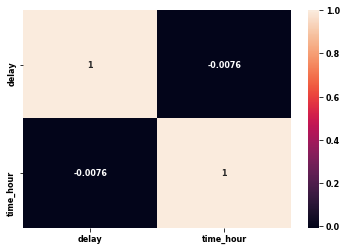

In [324]:
corr = df_model.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,annot=True)

correlation time_hour & delay = -0.007568512009817507


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


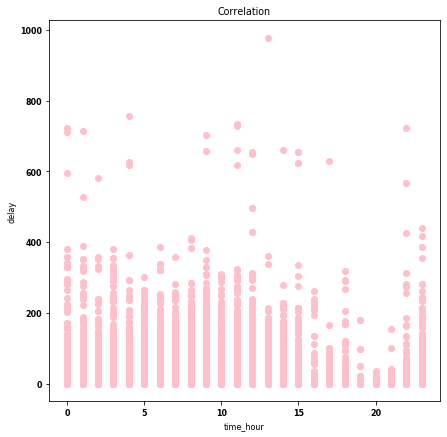

In [325]:
x = df_raw['time_hour']
y = df_raw['delay']

print('correlation {} & {} = {}'.format('time_hour','delay', \
                                   df_raw['delay'].corr(df_raw['time_hour'])))
plt.figure(figsize=(7,7))
plt.scatter(x,y, color='pink')
plt.title('Correlation')
plt.xlabel('time_hour')
plt.ylabel('delay')
plt.show()

### Take Day

In [565]:
df_raw['time_day'] =  pd.to_datetime(df_raw['scheduled_departure_time']).dt.day

In [513]:
df_test['time_day'] =  pd.to_datetime(df_test['scheduled_departure_time']).dt.day

In [327]:
df_raw.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,day_group,afternoon,dawn,evening,morning,night,Airbus,Boeing,Other,time_day
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,night,0,0,0,0,1,1,0,0,5
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,night,0,0,0,0,1,1,0,0,5
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,night,0,0,0,0,1,1,0,0,5
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,night,0,0,0,0,1,1,0,0,5
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,night,0,0,0,0,1,1,0,0,5


correlation time_day & delay = 0.03618224510872969


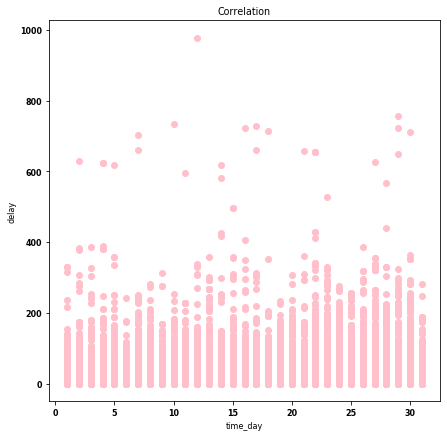

In [328]:
x = df_raw['time_day']
y = df_raw['delay']

print('correlation {} & {} = {}'.format('time_day','delay', \
                                   df_raw['delay'].corr(df_raw['time_day'])))
plt.figure(figsize=(7,7))
plt.scatter(x,y, color='pink')
plt.title('Correlation')
plt.xlabel('time_day')
plt.ylabel('delay')
plt.show()

In [566]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df_raw['delay_level'] = df_raw['delay'].apply(delay_type)

In [514]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df_test['delay_level'] = df_test['delay'].apply(delay_type)

In [567]:
df_raw.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour,day_group,dawn,evening,morning,night,AIRLINE__ANA,AIRLINE__Air Astana,AIRLINE__Air Canada,AIRLINE__Air China,AIRLINE__Air France,AIRLINE__Air India,AIRLINE__Air Mauritius,AIRLINE__Air New Zealand,AIRLINE__Air Seoul,AIRLINE__Air Seychelles,AIRLINE__AirAsia,AIRLINE__AirAsia X,AIRLINE__Alitalia,AIRLINE__American Airlines,AIRLINE__Asiana Airlines,AIRLINE__Austrian,AIRLINE__Bangkok Airways,AIRLINE__Batik Air,AIRLINE__Biman Bangladesh Airlines,AIRLINE__British Airways,AIRLINE__Cambodia Angkor Air,AIRLINE__Cargolux,AIRLINE__Cathay Dragon,AIRLINE__Cathay Pacific,AIRLINE__Cebu Pacific Air,AIRLINE__China Airlines,AIRLINE__China Eastern Airlines,AIRLINE__China Southern Airlines,AIRLINE__Citilink,AIRLINE__Condor,AIRLINE__Delta Air Lines,AIRLINE__EASTAR JET,AIRLINE__EVA Air,AIRLINE__EgyptAir,AIRLINE__Emirates,AIRLINE__Ethiopian Airlines,AIRLINE__Etihad Airways,AIRLINE__Finnair,AIRLINE__Firefly,AIRLINE__Garuda Indonesia,AIRLINE__Guangxi Beibu Gulf Airlines,AIRLINE__Hawaiian Airlines,AIRLINE__Himalaya Airlines,AIRLINE__Hong Kong Airlines,AIRLINE__Iberia,AIRLINE__IndiGo,AIRLINE__Indonesia AirAsia,AIRLINE__Iraqi Airways,AIRLINE__JAL,AIRLINE__Jeju Air,AIRLINE__Jet Airways (India),AIRLINE__Jetstar Asia,AIRLINE__Jin Air,AIRLINE__KLM,AIRLINE__Kenya Airways,AIRLINE__Korean Air,AIRLINE__Lion Air,AIRLINE__Lucky Air,AIRLINE__Lufthansa,AIRLINE__Mahan Air,AIRLINE__Malaysia Airlines,AIRLINE__Malindo Air,AIRLINE__Myanmar Airways International,AIRLINE__Nepal Airlines,AIRLINE__Oman Air,AIRLINE__Pakistan International Airlines,AIRLINE__Philippine Airlines,AIRLINE__Philippines AirAsia,AIRLINE__Qantas,AIRLINE__Qatar Airways,AIRLINE__Raya Airways,AIRLINE__Regent Airways,AIRLINE__Royal Brunei Airlines,AIRLINE__Royal Jordanian,AIRLINE__SAS,AIRLINE__SWISS,AIRLINE__Saudia,AIRLINE__Scoot,AIRLINE__Shanghai Airlines,AIRLINE__Shenzhen Airlines,AIRLINE__Silk Way West,AIRLINE__SilkAir,AIRLINE__Singapore Airlines,AIRLINE__Spring Airlines,AIRLINE__SriLankan Airlines,AIRLINE__Sriwijaya Air,AIRLINE__TAP Portugal,AIRLINE__Thai AirAsia,AIRLINE__Thai Airways International,AIRLINE__Thai Smile,AIRLINE__Turkish Airlines,AIRLINE__US-Bangla Airlines,AIRLINE__Uni-Top Airlines,AIRLINE__United Airlines,AIRLINE__Uzbekistan Airways,AIRLINE__VietJet Air,AIRLINE__Vietnam Airlines,AIRLINE__Virgin Australia,AIRLINE__Volga-Dnepr,AIRLINE__Wings Air (Indonesia),AIRLINE__Xiamen Airlines,AIRLINE__YTO Cargo,AIRLINE__flynas,time_day,delay_level
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus,1,0,0,22,night,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,Airbus,1,0,0,22,night,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
2,3,

## How the origin airport impact delays

In [378]:
identify_airport = df_raw.set_index('departure_airport_code')['departure_airport_city'].to_dict()

In [365]:
df = df_raw

airport_mean_delays = pd.DataFrame(pd.Series(df['departure_airport_city'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['airline'] == carrier]
    test = df1['delay'].groupby(df['departure_airport_city']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

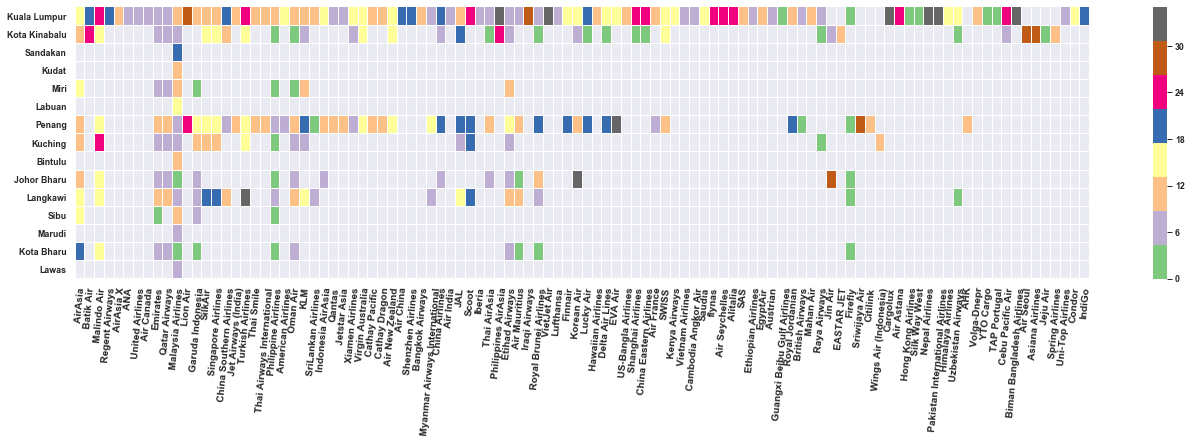

In [377]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(50,5))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)



In [387]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
#_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup]) 

In [388]:
df2=df
#_______________________________
def func2(x, a, b, c):
    return a * x**2 +  b*x + c
#_______________________________
df2['heure_depart'] =  pd.to_datetime(df2['scheduled_departure_time']).apply(lambda x:x.time())
test2 = df2['delay'].groupby(df2['heure_depart']).apply(get_stats).unstack()
fct = lambda x:x.hour*3600+x.minute*60+x.second
x_val = np.array([fct(s) for s in test2.index]) 
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0 = [1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index = test2.index)

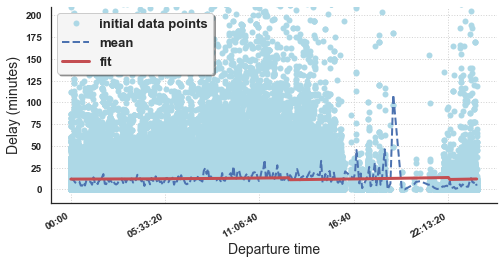

In [390]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot_date(df2['heure_depart'], df2['delay'],
                    markeredge=False, label='initial data points')
fig1.cust_plot(test2.index, test2['mean'], linestyle='--', linewidth=2, label='mean')
fig1.cust_plot(test2.index, test2['fit'], color='r', linestyle='-', linewidth=3, label='fit')
fig1.style() ; fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
fig1.set_ylim(-15, 210)

In [546]:
df_raw.head(2)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,Airbus


# Linear Regression

In [482]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [570]:
temp =df_raw.select_dtypes(include=['int','int64','float64','uint8']).columns
x = df_raw.loc[:,temp]

y = df_raw.loc[:,df.columns == 'delay']

In [603]:
# x.drop(['id', 'delay','delay_level'], axis=1,inplace=True)
# x.drop(['delay_level'], axis=1,inplace=True)

# x.head()

TypeError: 'Index' object is not callable

In [617]:
df2 = x.filter(regex='AIRLINE__')
x.drop(df2.columns,axis=1,inplace=True)

In [484]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [608]:
Mult_regression = LinearRegression()
Mult_regression.fit(x,y)

# y_pred_train = Mult_regression.predict(x_train)
# y_pred_test = Mult_regression.predict(x_test)
y_pred_train = Mult_regression.predict(x)

# print('test mse = {}'.format(mean_squared_error(y_pred_test,y_test)))
print('train mse = {}'.format(mean_squared_error(y_pred_train,y)))

train mse = 670.1106145450677


In [609]:
temp =df_test.select_dtypes(include=['int','int64','float64','uint8']).columns
x_test = df_test.loc[:,temp]
y_test = df_test.loc[:,df.columns == 'delay']

In [611]:
x_test.drop(['delay','id'],axis=1,inplace=True)
x_test.drop(['delay_level'], axis=1,inplace=True)
x_test.head(1)

,Airbus,Boeing,Other,time_hour,dawn,evening,morning,night,AIRLINE__Air Astana,AIRLINE__Air Canada,AIRLINE__Air China,AIRLINE__Air France,AIRLINE__Air India,AIRLINE__Air Mauritius,AIRLINE__Air New Zealand,AIRLINE__Air Seoul,AIRLINE__Air Seychelles,AIRLINE__AirAsia,AIRLINE__AirAsia X,AIRLINE__Alitalia,AIRLINE__American Airlines,AIRLINE__Asiana Airlines,AIRLINE__Austrian,AIRLINE__Bangkok Airways,AIRLINE__Batik Air,AIRLINE__Biman Bangladesh Airlines,AIRLINE__British Airways,AIRLINE__Cambodia Angkor Air,AIRLINE__Cargolux,AIRLINE__Cathay Dragon,AIRLINE__Cathay Pacific,AIRLINE__Cebu Pacific Air,AIRLINE__China Airlines,AIRLINE__China Eastern Airlines,AIRLINE__China Southern Airlines,AIRLINE__Citilink,AIRLINE__Condor,AIRLINE__Delta Air Lines,AIRLINE__EASTAR JET,AIRLINE__EVA Air,AIRLINE__EgyptAir,AIRLINE__Emirates,AIRLINE__Ethiopian Airlines,AIRLINE__Etihad Airways,AIRLINE__Finnair,AIRLINE__Firefly,AIRLINE__Garuda Indonesia,AIRLINE__Hawaiian Airlines,AIRLINE__Himalaya Airlines,AIRLINE__Hong Kong Airlines,AIRLINE__Iberia,AIRLINE__IndiGo,AIRLINE__Indonesia AirAsia,AIRLINE__Iraqi Airways,AIRLINE__JAL,AIRLINE__Jeju Air,AIRLINE__Jet Airways (India),AIRLINE__Jetstar Asia,AIRLINE__Jin Air,AIRLINE__KLM,AIRLINE__Kenya Airways,AIRLINE__Korean Air,AIRLINE__Lion Air,AIRLINE__Lucky Air,AIRLINE__Lufthansa,AIRLINE__Mahan Air,AIRLINE__Malaysia Airlines,AIRLINE__Malindo Air,AIRLINE__Myanmar Airways International,AIRLINE__Nepal Airlines,AIRLINE__Oman Air,AIRLINE__Pakistan International Airlines,AIRLINE__Philippine Airlines,AIRLINE__Philippines AirAsia,AIRLINE__Qantas,AIRLINE__Qatar Airways,AIRLINE__Raya Airways,AIRLINE__Regent Airways,AIRLINE__Royal Brunei Airlines,AIRLINE__Royal Jordanian,AIRLINE__SAS,AIRLINE__SWISS,AIRLINE__Saudia,AIRLINE__Scoot,AIRLINE__Shanghai Airlines,AIRLINE__Shenzhen Airlines,AIRLINE__Silk Way West,AIRLINE__SilkAir,AIRLINE__Singapore Airlines,AIRLINE__Spring Airlines,AIRLINE__SriLankan Airlines,AIRLINE__Sriwijaya Air,AIRLINE__TAP Portugal,AIRLINE__TUI Airways,AIRLINE__Thai AirAsia,AIRLINE__Thai Airways International,AIRLINE__Thai Smile,AIRLINE__Turkish Airlines,AIRLINE__US-Bangla Airlines,AIRLINE__United Airlines,AIRLINE__Uzbekistan Airways,AIRLINE__VietJet Air,AIRLINE__Vietnam Airlines,AIRLINE__Virgin Australia,AIRLINE__Wings Air (Indonesia),AIRLINE__Xiamen Airlines,AIRLINE__YTO Cargo,AIRLINE__flynas,time_day
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [616]:
df2 = x_test.filter(regex='AIRLINE__')
x_test.drop(df2.columns,axis=1,inplace=True)

In [613]:
Mult_regression = LinearRegression()
Mult_regression.fit(x_test,y_test)

# y_pred_train = Mult_regression.predict(x_train)
y_pred_test = Mult_regression.predict(x_test)
# y_pred_train = Mult_regression.predict(x)

print('test mse = {}'.format(mean_squared_error(y_pred_test,y_test)))
# print('train mse = {}'.format(mean_squared_error(y_pred_train,y)))

test mse = 884.4554459559419


In [618]:
x.head(1)

,Airbus,Boeing,Other,time_hour,dawn,evening,morning,night,time_day
0,1,0,0,22,0,0,0,1,5


In [597]:
import statsmodels.api as sm

In [619]:
result = sm.OLS(y,x).fit()

display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delay   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     365.7
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:12:12   Log-Likelihood:            -5.2142e+05
No. Observations:              111068   AIC:                         1.043e+06
Df Residuals:                  111059   BIC:                         1.043e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Airbus         4.5434      0.659      6.899      0.000       3.253       5.834
Boeing         1.8719      0.657      2.850      0.004       0.584       3.159
Other         -3.4563      0.677     -5.106      0.000      -4.783      -2.130
time_hour      0.7812      0.046     17.101      0.000       0.692       0.871
dawn           4.4599      0.595      7.489      0.000       3.293       5.627
evening       -3.8010      0.878     -4.327      0.000      -5.523      -2.079
morning        3.0611      0.338      9.060      0.000       2.399       3.723
night        -17.0276      0.530    -32.117      0.000     -18.067     -15.988
time_day       0.1124      0.009     11.928      0.000       0.094       0.131
==============================================================================
Omnibus:                   155948.699   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         82563078.824
Skew:                           8.092   Prob(JB):                         0.00
Kurtosis:                     135.584   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistic Regression

In [630]:
from sklearn.linear_model import LogisticRegression


In [625]:
df_prepare = df_raw

def __default(x):
    if x  > 60:
        return 1
df_prepare['default'] = df_prepare['delay'].apply(__default)

target = df_prepare['default']
temp = df_prepare.drop(['delay','delay_level','id'],axis=1)

from sklearn.preprocessing import StandardScaler

dataset_dummies = temp.select_dtypes(exclude=['int','int64','float64'])
dataset_int = temp.select_dtypes(include = ['int','int64','float64'] )


dataset_dummies_2 = pd.get_dummies(dataset_dummies, drop_first=True)
df_model = pd.concat([dataset_int,dataset_dummies_2,target], axis = 1 )

x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1]


# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

SC = StandardScaler()
# 
x = SC.fit_transform(x)
# x_train = SC.fit_transform(x_train)
# x_test = SC.fit_transform(x_test)


MemoryError: 

In [652]:
df_prepare = df_raw

def default(x):
    if x  > 60:
        return 1
    else :
        return 0
df_prepare['default'] = df_prepare['delay'].apply(default)

target = df_prepare['default']
temp = df_prepare.drop(['delay','delay_level','id','default'],axis=1)



In [653]:
df_prepare.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,departure_airport_timezone,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_type,Airbus,Boeing,Other,time_hour,day_group,dawn,evening,morning,night,AIRLINE__ANA,AIRLINE__Air Astana,AIRLINE__Air Canada,AIRLINE__Air China,AIRLINE__Air France,AIRLINE__Air India,AIRLINE__Air Mauritius,AIRLINE__Air New Zealand,AIRLINE__Air Seoul,AIRLINE__Air Seychelles,AIRLINE__AirAsia,AIRLINE__AirAsia X,AIRLINE__Alitalia,AIRLINE__American Airlines,AIRLINE__Asiana Airlines,AIRLINE__Austrian,AIRLINE__Bangkok Airways,AIRLINE__Batik Air,AIRLINE__Biman Bangladesh Airlines,AIRLINE__British Airways,AIRLINE__Cambodia Angkor Air,AIRLINE__Cargolux,AIRLINE__Cathay Dragon,AIRLINE__Cathay Pacific,AIRLINE__Cebu Pacific Air,AIRLINE__China Airlines,AIRLINE__China Eastern Airlines,AIRLINE__China Southern Airlines,AIRLINE__Citilink,AIRLINE__Condor,AIRLINE__Delta Air Lines,AIRLINE__EASTAR JET,AIRLINE__EVA Air,AIRLINE__EgyptAir,AIRLINE__Emirates,AIRLINE__Ethiopian Airlines,AIRLINE__Etihad Airways,AIRLINE__Finnair,AIRLINE__Firefly,AIRLINE__Garuda Indonesia,AIRLINE__Guangxi Beibu Gulf Airlines,AIRLINE__Hawaiian Airlines,AIRLINE__Himalaya Airlines,AIRLINE__Hong Kong Airlines,AIRLINE__Iberia,AIRLINE__IndiGo,AIRLINE__Indonesia AirAsia,AIRLINE__Iraqi Airways,AIRLINE__JAL,AIRLINE__Jeju Air,AIRLINE__Jet Airways (India),AIRLINE__Jetstar Asia,AIRLINE__Jin Air,AIRLINE__KLM,AIRLINE__Kenya Airways,AIRLINE__Korean Air,AIRLINE__Lion Air,AIRLINE__Lucky Air,AIRLINE__Lufthansa,AIRLINE__Mahan Air,AIRLINE__Malaysia Airlines,AIRLINE__Malindo Air,AIRLINE__Myanmar Airways International,AIRLINE__Nepal Airlines,AIRLINE__Oman Air,AIRLINE__Pakistan International Airlines,AIRLINE__Philippine Airlines,AIRLINE__Philippines AirAsia,AIRLINE__Qantas,AIRLINE__Qatar Airways,AIRLINE__Raya Airways,AIRLINE__Regent Airways,AIRLINE__Royal Brunei Airlines,AIRLINE__Royal Jordanian,AIRLINE__SAS,AIRLINE__SWISS,AIRLINE__Saudia,AIRLINE__Scoot,AIRLINE__Shanghai Airlines,AIRLINE__Shenzhen Airlines,AIRLINE__Silk Way West,AIRLINE__SilkAir,AIRLINE__Singapore Airlines,AIRLINE__Spring Airlines,AIRLINE__SriLankan Airlines,AIRLINE__Sriwijaya Air,AIRLINE__TAP Portugal,AIRLINE__Thai AirAsia,AIRLINE__Thai Airways International,AIRLINE__Thai Smile,AIRLINE__Turkish Airlines,AIRLINE__US-Bangla Airlines,AIRLINE__Uni-Top Airlines,AIRLINE__United Airlines,AIRLINE__Uzbekistan Airways,AIRLINE__VietJet Air,AIRLINE__Vietnam Airlines,AIRLINE__Virgin Australia,AIRLINE__Volga-Dnepr,AIRLINE__Wings Air (Indonesia),AIRLINE__Xiamen Airlines,AIRLINE__YTO Cargo,AIRLINE__flynas,time_day,delay_level,default
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,Kota Bharu,KBR,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Airbus,1,0,0,22,night,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,Asia/Kuala_Lumpur,Jakarta,CGK,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,Airbus,1,0,0,22,night,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [658]:
from sklearn.preprocessing import StandardScaler

dataset_dummies = temp.select_dtypes(exclude=['int','int64','float64'])
# dataset_dummies = temp['airline']
dataset_int = temp.select_dtypes(include = ['int','int64','float64'] )


dataset_dummies_2 = pd.get_dummies(dataset_dummies, drop_first=True)
df_model = pd.concat([dataset_int,dataset_dummies_2,target], axis = 1 )

In [659]:

df_model.head()

time_hour  time_day  Airbus  Boeing  Other  dawn  evening  morning  night  AIRLINE__ANA  AIRLINE__Air Astana  AIRLINE__Air Canada  AIRLINE__Air China  AIRLINE__Air France  AIRLINE__Air India  AIRLINE__Air Mauritius  AIRLINE__Air New Zealand  AIRLINE__Air Seoul  AIRLINE__Air Seychelles  AIRLINE__AirAsia  AIRLINE__AirAsia X  AIRLINE__Alitalia  AIRLINE__American Airlines  AIRLINE__Asiana Airlines  AIRLINE__Austrian  AIRLINE__Bangkok Airways  AIRLINE__Batik Air  AIRLINE__Biman Bangladesh Airlines  AIRLINE__British Airways  AIRLINE__Cambodia Angkor Air  AIRLINE__Cargolux  AIRLINE__Cathay Dragon  AIRLINE__Cathay Pacific  AIRLINE__Cebu Pacific Air  AIRLINE__China Airlines  AIRLINE__China Eastern Airlines  AIRLINE__China Southern Airlines  AIRLINE__Citilink  AIRLINE__Condor  AIRLINE__Delta Air Lines  AIRLINE__EASTAR JET  AIRLINE__EVA Air  AIRLINE__EgyptAir  AIRLINE__Emirates  AIRLINE__Ethiopian Airlines  AIRLINE__Etihad Airways  AIRLINE__Finnair  AIRLINE__Firefly  AIRLINE__Garuda Indonesia  AIRLINE__Guangxi Beibu Gulf Airlines  AIRLINE__Hawaiian Airlines  AIRLINE__Himalaya Airlines  AIRLINE__Hong Kong Airlines  AIRLINE__Iberia  AIRLINE__IndiGo  AIRLINE__Indonesia AirAsia  AIRLINE__Iraqi Airways  AIRLINE__JAL  AIRLINE__Jeju Air  AIRLINE__Jet Airways (India)  AIRLINE__Jetstar Asia  AIRLINE__Jin Air  AIRLINE__KLM  AIRLINE__Kenya Airways  AIRLINE__Korean Air  AIRLINE__Lion Air  AIRLINE__Lucky Air  AIRLINE__Lufthansa  AIRLINE__Mahan Air  AIRLINE__Malaysia Airlines  \
0         22         5       1       0      0     0        0        0      1             0                    0                    0                   0                    0                   0                       0                         0                   0                        0                 1                   0                  0                           0                         0                  0                         0                   0                                   0                         0                             0                  0                       0                        0                          0                        0                                0                                 0                  0                0                         0                    0                 0                  0                  0                            0                        0                 0                 0                          0                                     0                           0                           0                            0                0                0                           0                       0             0                  0                             0                      0                 0             0                       0                    0                  0                   0                   0                   0                           0   
1         22         5       1       0      0     0        0        0      1             0                    0                    0                   0                    0                   0                       0                         0                   0                        0                 0                   0                  0                           0                         0                  0                         0                   1                                   0                         0                             0                  0                       0                        0                          0                        0                                0                                 0                  0                0                         0                    0                 0                  0                  0                            0                        0                 0                 0                          0                                     0  

In [663]:
x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1]


# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

SC = StandardScaler()
# 
x = SC.fit_transform(x)
# x_train = SC.fit_transform(x_train)
# x_test = SC.fit_transform(x_test)

Logistic_regression = LogisticRegression()
Logistic_regression.fit(x,y)
# Logistic_regression.fit(x_train,y_train)

y_pred_train = Logistic_regression.predict(x)
# y_pred_train = Logistic_regression.predict(x_train)
# y_pred_test = Logistic_regression.predict(x_test)

MemoryError: 

In [ ]:
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics

In [ ]:
cm = confusion_matrix(y,y_pred_train)
print(cm)